#Import Libraries and define a class for the objects

We will use numpy's vector operations to speed up calculations. Matplotlib's FuncAnimation will allow us to render a GIF of our system as it evolves with time.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d

class cel_obj:
    def __init__(obj, x, y, z, v_x, v_y, v_z, m):
        obj.pos = np.array([x, y, z])
        obj.vel = np.array([v_x, v_y, v_z])
        obj.m = m

#Initialize time variables and G

In [9]:
t_0 = 0 
t = t_0
div = 1
dt = 86400/div
t_end = 86400 * 365 * 1
t_array = np.arange(t_0, t_end, dt)
BIG_G = 6.67e-11

#Define the initial state of the planets

Data has been pulled from [NSSDCA](https://nssdc.gsfc.nasa.gov/planetary/factsheet/)

In [10]:
sun = cel_obj(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.989e30)
mercury = cel_obj(57.909e9, 0.0, 0.0, 0.0, 47.36e3, 0.0, 0.33011e24)
venus = cel_obj(108.209e9, 0.0, 0.0, 0.0, 35.02e3, 0.0, 4.8675e24)
earth = cel_obj(149.596e9, 0.0, 0.0, 0.0, 29.78e3, 0.0, 5.9724e24)
mars = cel_obj(227.923e9, 0.0, 0.0, 0.0, 24.07e3, 0.0, 0.64171e24)
jupiter = cel_obj(778.570e9, 0.0, 0.0, 0.0, 13e3, 0.0, 1898.19e24)
saturn = cel_obj(1433.529e9, 0.0, 0.0, 0.0, 9.68e3, 0.0, 568.34e24)
uranus = cel_obj(2872.463e9, 0.0, 0.0, 0.0, 6.80e3, 0.0, 86.813e24)
neptune = cel_obj(4495.060e9, 0.0, 0.0, 0.0, 5.43e3, 0.0, 102.413e24)

#Create arrays to store the timeseries data

In [11]:
orbital_entities = [sun, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune]
ke = []
pe = []
x_pos = [[],[],[],[]]
y_pos = [[],[],[],[]]
z_pos = [[],[],[],[]]

#Evolve the system!

We use a simple Euler integrator for the purpose.

In [12]:
while t<t_end:
    k = 0
    p = 0
    a_g = np.zeros_like(orbital_entities)
    for x in orbital_entities:
        k += 0.5 * x.m * (np.linalg.norm(x.vel))**2
    for i in range(len(orbital_entities)):
        for j in range(len(orbital_entities)):
            if i!=j:
                dist = np.linalg.norm(orbital_entities[i].pos - orbital_entities[j].pos) + 0.0001
                a_g[i] += (orbital_entities[i].pos - orbital_entities[j].pos)*(-1 * BIG_G * orbital_entities[j].m)/dist**3
                p += ((-1 * BIG_G * orbital_entities[i].m * orbital_entities[j].m)/dist)*0.5
    ke.append(k/1e35)
    pe.append(p/1e35)
    for m1_id in range(len(orbital_entities)):                 
        orbital_entities[m1_id].vel += a_g[m1_id] * dt
    for e_id in range(len(orbital_entities)):
        orbital_entities[e_id].pos += orbital_entities[e_id].vel * dt
    for i in range(1, 5):
        x_pos[i-1].append(orbital_entities[i].pos[0])
        y_pos[i-1].append(orbital_entities[i].pos[1])
        z_pos[i-1].append(orbital_entities[i].pos[2])
    t += dt
e = []
for i in range(len(ke)):
    e.append(ke[i] + pe[i])

#Plot the orbits

Don't worry about the ffmpeg warning, just know that the GIF is saved in the directory where this notebook is present.

MovieWriter ffmpeg unavailable; using Pillow instead.


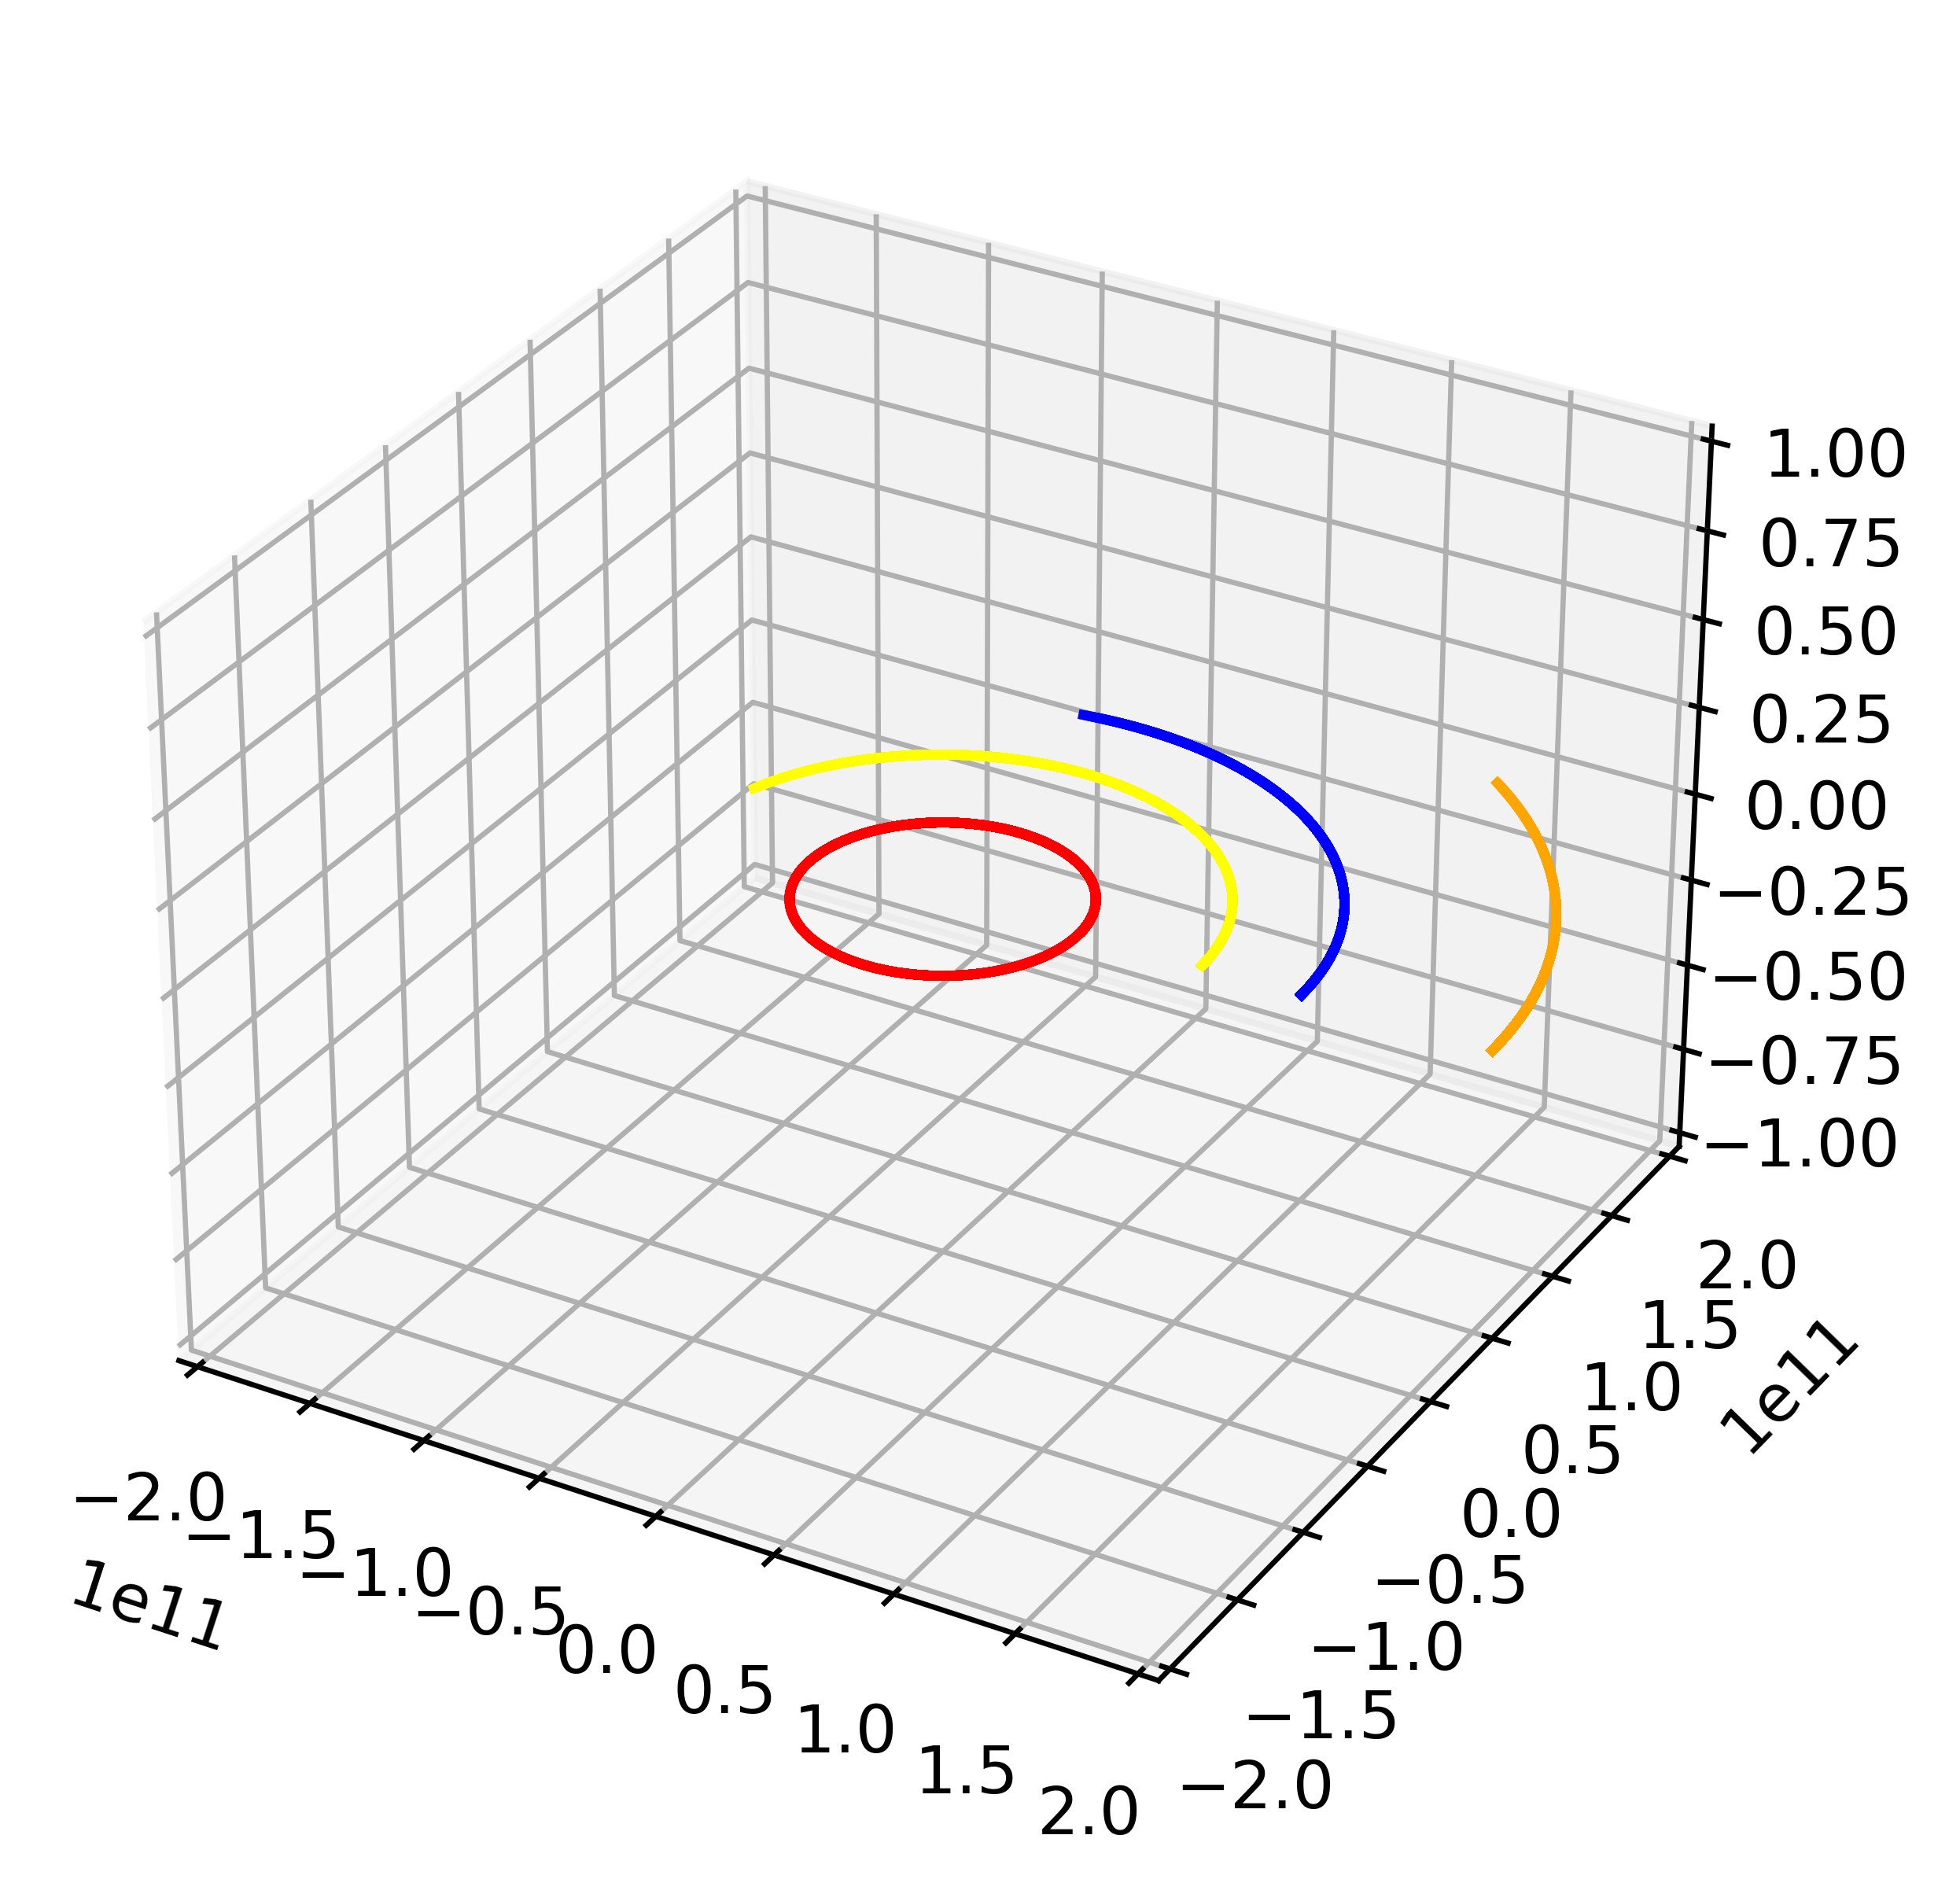

In [13]:
fig = plt.figure(dpi=600)
ax = plt.axes(projection='3d')
ax.axes.set_xlim3d(left=-2e11, right=2e11) 
ax.axes.set_ylim3d(bottom=-2e11, top=2e11) 
ax.axes.set_zlim3d(bottom=-1, top=1)
colors = ['red', 'yellow', 'blue', 'orange']

def anim_func(i):
    for j in range(4):    
        ax.plot3D(x_pos[j][:i], y_pos[j][:i], z_pos[j][:i], color=colors[j])
        
animation = FuncAnimation(fig, anim_func, interval = 50)
animation.save("solar_system.gif", dpi=300)

#Plot the energies

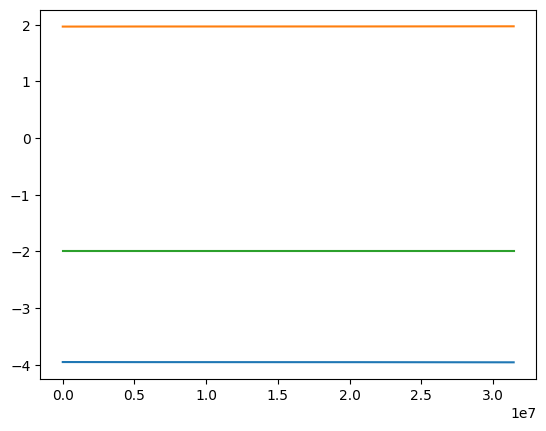

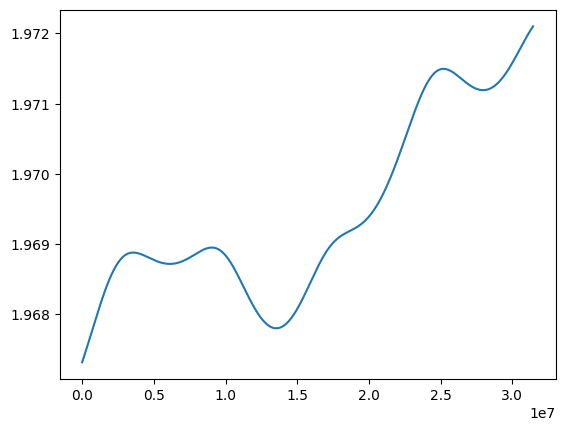

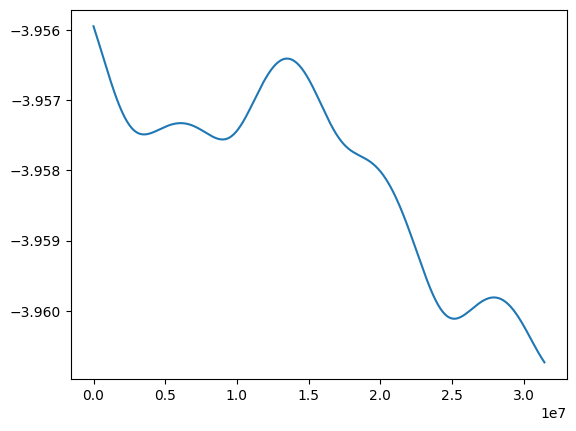

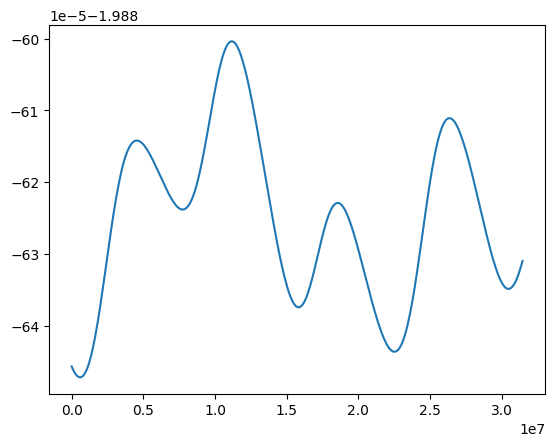

In [14]:
fig3 = plt.figure()
plt.plot(t_array, pe)
plt.plot(t_array, ke)
plt.plot(t_array, e)
fig4 = plt.figure()
plt.plot(t_array, ke)
fig5 = plt.figure()
plt.plot(t_array, pe)
fig6 = plt.figure()
plt.plot(t_array, e)